### 데이터 가공

## 1. 데이터를 읽어들여 bikes데이터 프레임 만들기

In [ ]:
# folium 모듈 설치하기

In [7]:
# 모듈 import하기 / pandas, seaborn, matplotlib.pyplot, folium
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium

In [11]:
b_temp1 = pd.read_csv('data/bike_rent_1.csv', encoding='cp949', parse_dates=['대여일시'])
b_temp1.head()

자전거번호                대여일시  대여 대여소번호            대여 대여소명  이용시간  이용거리
0  SPB-22040 2019-06-03 08:49:00       646  장한평역 1번출구 (국민은행앞)    27  1330
1  SPB-07446 2019-06-03 08:33:00       526           용답토속공원 앞    54  1180
2  SPB-20387 2019-06-05 08:27:00       646  장한평역 1번출구 (국민은행앞)    12  1930
3  SPB-16794 2019-06-05 08:46:00       646  장한평역 1번출구 (국민은행앞)     6  1340
4  SPB-18266 2019-06-10 08:27:00       529       장한평역 8번 출구 앞     5  1230

In [12]:
b_temp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399999 entries, 0 to 399998
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   자전거번호     399999 non-null  object        
 1   대여일시      399999 non-null  datetime64[ns]
 2   대여 대여소번호  399999 non-null  int64         
 3   대여 대여소명   399999 non-null  object        
 4   이용시간      399999 non-null  int64         
 5   이용거리      399999 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 18.3+ MB


In [33]:
# 6개의 파일로 나누어진 bike_rent파일을 하나씩 읽어오기

bikes_temp = {}         #빈 데이터 프레임

# 6개의 파일을 bikes_temp[0]~[5]까지 읽어 들인다

for i in range(0, 6) :
    bikes_temp[i] = pd.read_csv(f'data/bike_rent_{i+1}.csv', encoding='cp949', parse_dates=['대여일시'])

In [34]:
#각각 파일 확인
len(bikes_temp)

6

In [35]:
bikes_temp[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399999 entries, 0 to 399998
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   자전거번호     399999 non-null  object        
 1   대여일시      399999 non-null  datetime64[ns]
 2   대여 대여소번호  399999 non-null  int64         
 3   대여 대여소명   399999 non-null  object        
 4   이용시간      399999 non-null  int64         
 5   이용거리      399999 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 18.3+ MB


In [36]:
#6개의 파일을 최종 bikes파일로 데이터 프레임 만들어 bikes에 저장하기
#ignore_index 기존 인덱스를 무시하고 다시 순서를 0부터 정한다.
bikes = pd.DataFrame()

bikes = pd.concat(bikes_temp, ignore_index=True)

In [37]:
#최종 행을 확인해서 제대로 연결 되었는지 확인  2215631행
bikes.tail()

자전거번호                대여일시  대여 대여소번호     대여 대여소명  이용시간  이용거리
2215627  SPB-22438 2019-06-24 07:40:00       240  문래역 4번출구 앞    13   900
2215628  SPB-24455 2019-06-25 07:34:00       240  문래역 4번출구 앞     6   880
2215629  SPB-24557 2019-06-26 08:19:00       240  문래역 4번출구 앞     7   930
2215630  SPB-00649 2019-06-27 07:38:00       240  문래역 4번출구 앞    11  1030
2215631  SPB-14209 2019-06-28 07:37:00       240  문래역 4번출구 앞     6  1010

## 2.데이터 프레임 관찰

In [39]:
# bike데이터 프레임의 기본정보 확인하기
pd.options.display.float_format='{:.2f}'.format
bikes.describe()

대여일시   대여 대여소번호       이용시간       이용거리
count                        2215632 2215632.00 2215632.00 2215632.00
mean   2019-06-16 08:40:01.500303872    1226.15      27.17    3912.92
min              2019-06-01 00:00:00       3.00       1.00       0.00
25%              2019-06-08 22:04:00     505.00       8.00    1220.00
50%              2019-06-16 15:13:00    1159.00      17.00    2270.00
75%              2019-06-23 20:22:00    1846.00      37.00    4670.00
max              2019-06-30 23:59:00    9998.00    3133.00  232310.00
std                              NaN     849.92      29.08    5145.47

In [40]:
# 프레임의 전체 구조 (행, 열) 확인하기
bikes.shape

(2215632, 6)

In [12]:
# 프레임의 행 확인하기


2215632

In [13]:
#프레임의 열 확인하기


6

In [14]:
#프레임의 index 확인하기,  인덱스의 시작과 끝 그리고 step


RangeIndex(start=0, stop=2215632, step=1)

In [15]:
#프레임의 컬럼의 내용 확인하기


Index(['자전거번호', '대여일시', '대여 대여소번호', '대여 대여소명', '이용시간', '이용거리'], dtype='object')

In [16]:
# 데이터 타입 확인하기


자전거번호               object
대여일시        datetime64[ns]
대여 대여소번호             int64
대여 대여소명             object
이용시간                 int64
이용거리                 int64
dtype: object

In [164]:
# 데이터 프레임 통계 요약정보 확인하기


대여일시   대여 대여소번호       이용시간       이용거리
count                        2215632 2215632.00 2215632.00 2215632.00
mean   2019-06-16 08:40:01.500303872    1226.15      27.17    3912.92
min              2019-06-01 00:00:00       3.00       1.00       0.00
25%              2019-06-08 22:04:00     505.00       8.00    1220.00
50%              2019-06-16 15:13:00    1159.00      17.00    2270.00
75%              2019-06-23 20:22:00    1846.00      37.00    4670.00
max              2019-06-30 23:59:00    9998.00    3133.00  232310.00
std                              NaN     849.92      29.08    5145.47

In [51]:
# 소숫점 자리를 소수둘째자리까지만 보기 편하게 변환
pd.options.display.float_format='{:.2f}'.format

In [41]:
## 수치데이터 이외의 다른 정보 확인하기 'object', 'datetime64'
bikes.describe(include=['object', 'datetime64'])

자전거번호                           대여일시        대여 대여소명
count     2215632                        2215632        2215632
unique      19029                            NaN           1543
top     SPB-17237                            NaN  뚝섬유원지역 1번출구 앞
freq          292                            NaN          12617
mean          NaN  2019-06-16 08:40:01.500303872            NaN
min           NaN            2019-06-01 00:00:00            NaN
25%           NaN            2019-06-08 22:04:00            NaN
50%           NaN            2019-06-16 15:13:00            NaN
75%           NaN            2019-06-23 20:22:00            NaN
max           NaN            2019-06-30 23:59:00            NaN

In [43]:
# 결측치 확인하기
bikes.isnull()

자전거번호   대여일시  대여 대여소번호  대여 대여소명   이용시간   이용거리
0        False  False     False    False  False  False
1        False  False     False    False  False  False
2        False  False     False    False  False  False
3        False  False     False    False  False  False
4        False  False     False    False  False  False
...        ...    ...       ...      ...    ...    ...
2215627  False  False     False    False  False  False
2215628  False  False     False    False  False  False
2215629  False  False     False    False  False  False
2215630  False  False     False    False  False  False
2215631  False  False     False    False  False  False

[2215632 rows x 6 columns]

In [44]:
# 열단위로 모두 합산하여 결측치 확인하기
bikes.isnull().sum()

자전거번호       0
대여일시        0
대여 대여소번호    0
대여 대여소명     0
이용시간        0
이용거리        0
dtype: int64

## 3 .시간계산에 따른 새로운 컬럼 추가

In [45]:
bikes.head()

자전거번호                대여일시  대여 대여소번호            대여 대여소명  이용시간  이용거리
0  SPB-22040 2019-06-03 08:49:00       646  장한평역 1번출구 (국민은행앞)    27  1330
1  SPB-07446 2019-06-03 08:33:00       526           용답토속공원 앞    54  1180
2  SPB-20387 2019-06-05 08:27:00       646  장한평역 1번출구 (국민은행앞)    12  1930
3  SPB-16794 2019-06-05 08:46:00       646  장한평역 1번출구 (국민은행앞)     6  1340
4  SPB-18266 2019-06-10 08:27:00       529       장한평역 8번 출구 앞     5  1230

In [53]:
bikes['대여일시'].dt.day

0           3
1           3
2           5
3           5
4          10
           ..
2215627    24
2215628    25
2215629    26
2215630    27
2215631    28
Name: 대여일시, Length: 2215632, dtype: int32

In [ ]:
# 대여일시에서 day정보 추출해서 일자 컬럼으로 추가하기
bikes['일자'] = bikes['대여일시'].dt.day
bikes.head(3)

자전거번호                대여일시  대여 대여소번호            대여 대여소명  이용시간  \
0        SPB-22040 2019-06-03 08:49:00       646  장한평역 1번출구 (국민은행앞)    27   
1        SPB-07446 2019-06-03 08:33:00       526           용답토속공원 앞    54   
2        SPB-20387 2019-06-05 08:27:00       646  장한평역 1번출구 (국민은행앞)    12   
3        SPB-16794 2019-06-05 08:46:00       646  장한평역 1번출구 (국민은행앞)     6   
4        SPB-18266 2019-06-10 08:27:00       529       장한평역 8번 출구 앞     5   
...            ...                 ...       ...                ...   ...   
2215627  SPB-22438 2019-06-24 07:40:00       240         문래역 4번출구 앞    13   
2215628  SPB-24455 2019-06-25 07:34:00       240         문래역 4번출구 앞     6   
2215629  SPB-24557 2019-06-26 08:19:00       240         문래역 4번출구 앞     7   
2215630  SPB-00649 2019-06-27 07:38:00       240         문래역 4번출구 앞    11   
2215631  SPB-14209 2019-06-28 07:37:00       240         문래역 4번출구 앞     6   

         이용거리  일자  
0        1330   3  
1        1180   3  
2        1930   5  
3        1340   5  
4        1230  10  
...       ...  ..  
2215627   900  24  
2215628   880  25  
2215629   930  26  
2215630  1030  27  
2215631  1010  28  

[2215632 rows x 7 columns]

In [ ]:
# 대여일시에서 시간정보 추출해서 대여시간대 컬럼으로 추가하기
bikes['대여시간대'] = bikes['대여일시'].dt.hour
bikes.head(3)

자전거번호                대여일시  대여 대여소번호            대여 대여소명  이용시간  \
0        SPB-22040 2019-06-03 08:49:00       646  장한평역 1번출구 (국민은행앞)    27   
1        SPB-07446 2019-06-03 08:33:00       526           용답토속공원 앞    54   
2        SPB-20387 2019-06-05 08:27:00       646  장한평역 1번출구 (국민은행앞)    12   
3        SPB-16794 2019-06-05 08:46:00       646  장한평역 1번출구 (국민은행앞)     6   
4        SPB-18266 2019-06-10 08:27:00       529       장한평역 8번 출구 앞     5   
...            ...                 ...       ...                ...   ...   
2215627  SPB-22438 2019-06-24 07:40:00       240         문래역 4번출구 앞    13   
2215628  SPB-24455 2019-06-25 07:34:00       240         문래역 4번출구 앞     6   
2215629  SPB-24557 2019-06-26 08:19:00       240         문래역 4번출구 앞     7   
2215630  SPB-00649 2019-06-27 07:38:00       240         문래역 4번출구 앞    11   
2215631  SPB-14209 2019-06-28 07:37:00       240         문래역 4번출구 앞     6   

         이용거리  일자  대여시간대  
0        1330   3      8  
1        1180   3      8  
2        1930   5      8  
3        1340   5      8  
4        1230  10      8  
...       ...  ..    ...  
2215627   900  24      7  
2215628   880  25      7  
2215629   930  26      8  
2215630  1030  27      7  
2215631  1010  28      7  

[2215632 rows x 8 columns]

In [68]:
# 대여일시에서 dayofweek 추출해서 요일 컬럼으로 추가하기
# 이때 요일이 숫자이므로 요일 이름으로 변경하여 추가하기
week = {0:'월', 1:'화', 2:'수', 3:'목', 4:'금', 5:'토', 6:'일'}

# map 사용
bikes['요일'] = bikes['대여일시'].dt.dayofweek.map(week)
# bikes['요일'] = bikes['대여일시'].dt.dayofweek.apply(lambda x: week.get(x))
bikes.head(3)

자전거번호                대여일시  대여 대여소번호            대여 대여소명  이용시간  이용거리  일자  \
0  SPB-22040 2019-06-03 08:49:00       646  장한평역 1번출구 (국민은행앞)    27  1330   3   
1  SPB-07446 2019-06-03 08:33:00       526           용답토속공원 앞    54  1180   3   
2  SPB-20387 2019-06-05 08:27:00       646  장한평역 1번출구 (국민은행앞)    12  1930   5   

   대여시간대 요일  
0      8  월  
1      8  월  
2      8  수

In [72]:
# 대여일시에서 dayofweek 추출해서 주말구분 컬럼으로 추가하기
# 요일 인데스 값이 5보다 작을 경우 평일 아닐 경우 주말
bikes['주말구분'] = bikes['대여일시'].dt.dayofweek.apply(lambda x: '평일' if x < 5 else '주말')
bikes.head()

자전거번호                대여일시  대여 대여소번호            대여 대여소명  이용시간  이용거리  일자  \
0  SPB-22040 2019-06-03 08:49:00       646  장한평역 1번출구 (국민은행앞)    27  1330   3   
1  SPB-07446 2019-06-03 08:33:00       526           용답토속공원 앞    54  1180   3   
2  SPB-20387 2019-06-05 08:27:00       646  장한평역 1번출구 (국민은행앞)    12  1930   5   
3  SPB-16794 2019-06-05 08:46:00       646  장한평역 1번출구 (국민은행앞)     6  1340   5   
4  SPB-18266 2019-06-10 08:27:00       529       장한평역 8번 출구 앞     5  1230  10   

   대여시간대 요일 주말구분  
0      8  월   평일  
1      8  월   평일  
2      8  수   평일  
3      8  수   평일  
4      8  월   평일

## 4. 장소적 특성에 따른 컬럼 추가

In [73]:
# 대여소들이 위치한 행정구역상의 구들을 알아내기 위해 "bike_shop.csv" 파일을 읽어오기 
# b_temp1 = pd.read_csv('data/bike_rent_1.csv', encoding='cp949', parse_dates=['대여일시'])
bike_shop = pd.read_csv('data/bike_shop.csv', encoding='cp949')

In [74]:
# 데이터프레임 살펴보기
bike_shop.head()

구분  대여소번호              대여소명    위도     경도  거치대수
0  마포구    101  101. (구)합정동 주민센터 37.55 126.91     5
1  마포구    102   102. 망원역 1번출구 앞 37.56 126.91    20
2  마포구    103   103. 망원역 2번출구 앞 37.55 126.91    14
3  마포구    104   104. 합정역 1번출구 앞 37.55 126.91    13
4  마포구    105   105. 합정역 5번출구 앞 37.55 126.91     5

In [34]:
bikes.head(3)    ## 대여소명 프레임과 컬럼명 확인

자전거번호                대여일시  대여 대여소번호            대여 대여소명  이용시간  이용거리  일자  \
0  SPB-22040 2019-06-03 08:49:00       646  장한평역 1번출구 (국민은행앞)    27  1330   3   
1  SPB-07446 2019-06-03 08:33:00       526           용답토속공원 앞    54  1180   3   
2  SPB-20387 2019-06-05 08:27:00       646  장한평역 1번출구 (국민은행앞)    12  1930   5   

   대여시간대 요일 주말구분  
0      8  월   평일  
1      8  월   평일  
2      8  수   평일

In [76]:
# 필요한 컬럼들을 추출해서 'bkie_gu'에 할당
# '구분','대여소번호','대여소명','위도','경도'
bike_gu = bike_shop[['구분','대여소번호','대여소명','위도','경도']]
bike_gu

구분  대여소번호              대여소명    위도     경도
0     마포구    101  101. (구)합정동 주민센터 37.55 126.91
1     마포구    102   102. 망원역 1번출구 앞 37.56 126.91
2     마포구    103   103. 망원역 2번출구 앞 37.55 126.91
3     마포구    104   104. 합정역 1번출구 앞 37.55 126.91
4     마포구    105   105. 합정역 5번출구 앞 37.55 126.91
...   ...    ...               ...   ...    ...
1532  광진구   3537    아차산 휴먼시아 아파트 옆 37.55 127.09
1533  성동구   3538          서울숲 IT캐슬 37.55 127.04
1534  강동구   3539              서원마을 37.56 127.13
1535  광진구   3541            커먼그라운드 37.55 127.09
1536  광진구   3542      래미안 구의파크 스위트 37.55 127.09

[1537 rows x 5 columns]

In [78]:
# bikes 데이터 프레임에 bike_gu 데이터프레임 합치기, 기준은 대여소 번호

bikes = pd.merge(bikes, bike_gu, left_on='대여 대여소번호', right_on='대여소번호')
bikes.head(3)

자전거번호                대여일시  대여 대여소번호            대여 대여소명  이용시간  이용거리  일자  \
0  SPB-22040 2019-06-03 08:49:00       646  장한평역 1번출구 (국민은행앞)    27  1330   3   
1  SPB-07446 2019-06-03 08:33:00       526           용답토속공원 앞    54  1180   3   
2  SPB-20387 2019-06-05 08:27:00       646  장한평역 1번출구 (국민은행앞)    12  1930   5   

   대여시간대 요일 주말구분    구분  대여소번호                    대여소명    위도     경도  
0      8  월   평일  동대문구    646  646. 장한평역 1번출구 (국민은행앞) 37.56 127.06  
1      8  월   평일   성동구    526           526. 용답토속공원 앞 37.56 127.06  
2      8  수   평일  동대문구    646  646. 장한평역 1번출구 (국민은행앞) 37.56 127.06

In [82]:
# 중복 컬럼 삭제 (대여소번호, 대여소명)하기
bikes = bikes.drop(['대여소번호','대여소명'], axis=1)

In [83]:
bikes.head(2)

자전거번호                대여일시  대여 대여소번호            대여 대여소명  이용시간  이용거리  일자  \
0  SPB-22040 2019-06-03 08:49:00       646  장한평역 1번출구 (국민은행앞)    27  1330   3   
1  SPB-07446 2019-06-03 08:33:00       526           용답토속공원 앞    54  1180   3   

   대여시간대 요일 주말구분    구분    위도     경도  
0      8  월   평일  동대문구 37.56 127.06  
1      8  월   평일   성동구 37.56 127.06

In [85]:
# 컬럼명 변경하기 '구분'-> '대여구','위도'-> '대여점위도','경도'-> '대여점경도'
bikes = bikes.rename(columns={'구분':'대여구','위도':'대여점위도','경도':'대여점경도'})
bikes.head(2)

자전거번호                대여일시  대여 대여소번호            대여 대여소명  이용시간  이용거리  일자  \
0  SPB-22040 2019-06-03 08:49:00       646  장한평역 1번출구 (국민은행앞)    27  1330   3   
1  SPB-07446 2019-06-03 08:33:00       526           용답토속공원 앞    54  1180   3   

   대여시간대 요일 주말구분   대여구  대여점위도  대여점경도  
0      8  월   평일  동대문구  37.56 127.06  
1      8  월   평일   성동구  37.56 127.06

In [87]:
#추가된 컬럼에 누락값이 있는지 확인하기
bikes.isnull().sum()

자전거번호       0
대여일시        0
대여 대여소번호    0
대여 대여소명     0
이용시간        0
이용거리        0
일자          0
대여시간대       0
요일          0
주말구분        0
대여구         0
대여점위도       0
대여점경도       0
dtype: int64

In [88]:
#바뀐 테이블의 정보 확인하기
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2209349 entries, 0 to 2209348
Data columns (total 13 columns):
 #   Column    Dtype         
---  ------    -----         
 0   자전거번호     object        
 1   대여일시      datetime64[ns]
 2   대여 대여소번호  int64         
 3   대여 대여소명   object        
 4   이용시간      int64         
 5   이용거리      int64         
 6   일자        int32         
 7   대여시간대     int32         
 8   요일        object        
 9   주말구분      object        
 10  대여구       object        
 11  대여점위도     float64       
 12  대여점경도     float64       
dtypes: datetime64[ns](1), float64(2), int32(2), int64(3), object(5)
memory usage: 202.3+ MB


## 5. 시간 개념에 따른 시각화

In [89]:
bikes.head(5)

자전거번호                대여일시  대여 대여소번호            대여 대여소명  이용시간  이용거리  일자  \
0  SPB-22040 2019-06-03 08:49:00       646  장한평역 1번출구 (국민은행앞)    27  1330   3   
1  SPB-07446 2019-06-03 08:33:00       526           용답토속공원 앞    54  1180   3   
2  SPB-20387 2019-06-05 08:27:00       646  장한평역 1번출구 (국민은행앞)    12  1930   5   
3  SPB-16794 2019-06-05 08:46:00       646  장한평역 1번출구 (국민은행앞)     6  1340   5   
4  SPB-18266 2019-06-10 08:27:00       529       장한평역 8번 출구 앞     5  1230  10   

   대여시간대 요일 주말구분   대여구  대여점위도  대여점경도  
0      8  월   평일  동대문구  37.56 127.06  
1      8  월   평일   성동구  37.56 127.06  
2      8  수   평일  동대문구  37.56 127.06  
3      8  수   평일  동대문구  37.56 127.06  
4      8  월   평일   성동구  37.56 127.06

## 한글 폰트 설정 

##### 설치된 글꼴 찾기

In [98]:
# import matplotlib.font_manager as fm

# font_list = [font.name for font in fm.fontManager.ttflist]

# font_list
# 'Malgun Gothic' in font_list

# plt.rc('font', family='Malgun Gothic', size=13)
# plt.title('한글 폰트 테스트')
# plt.plot([1,2,3,4])
# plt.xlabel('시간')
# plt.ylabel('거리')

# plt.show()

True

In [103]:
# 시각화를 위해 한글폰트 설정하기

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.rc('font', family='Malgun Gothic', size=13)

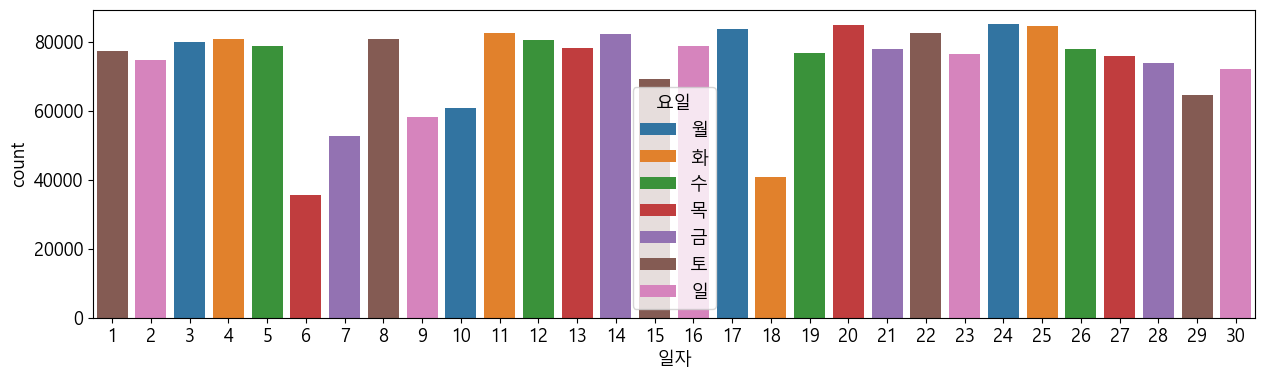

In [117]:
# 일자별 따릉이 이용건수 그래프 그리기
plt.figure(figsize=(15,4))
sns.countplot(data=bikes, x='일자', hue='요일', hue_order=list('월화수목금토일'))
plt.show()

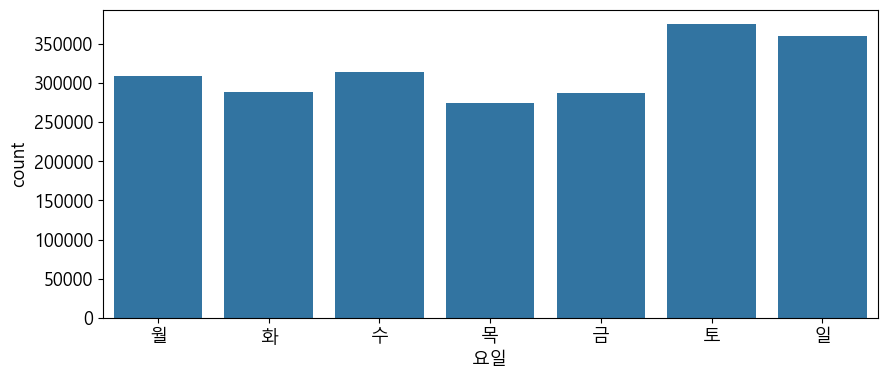

In [118]:
#요일별 따릉이 이용건수 그래프 그리기
plt.figure(figsize=(10,4))
# sns.countplot(data=bikes, x = '요일', order=['월화수목금토일'])
sns.countplot(data=bikes, x = '요일', order=list('월화수목금토일'))
plt.show()

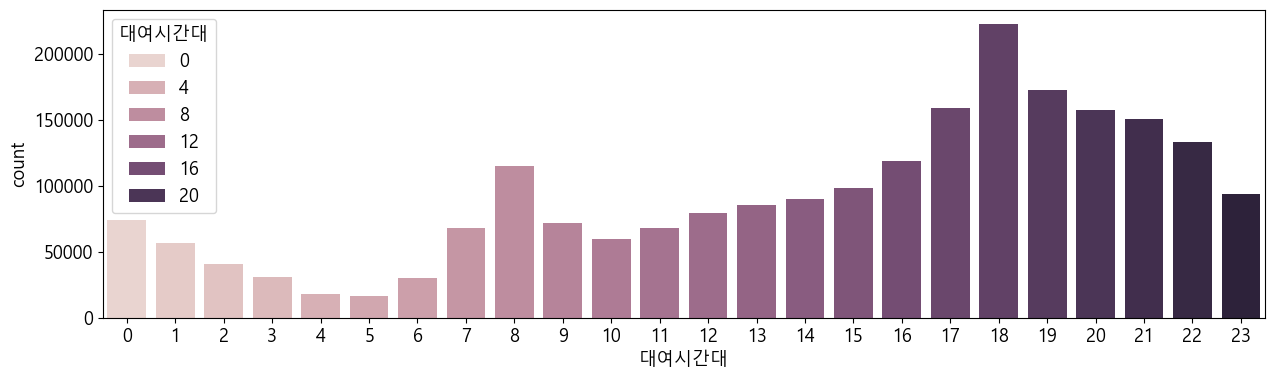

In [110]:
# 대여시간대별 따릉이 이용건수 그래프 그리기

plt.figure(figsize=(15,4))
sns.countplot(data=bikes, x = '대여시간대', hue='대여시간대')
plt.show()

In [ ]:
### sns.countplot() 사용하기

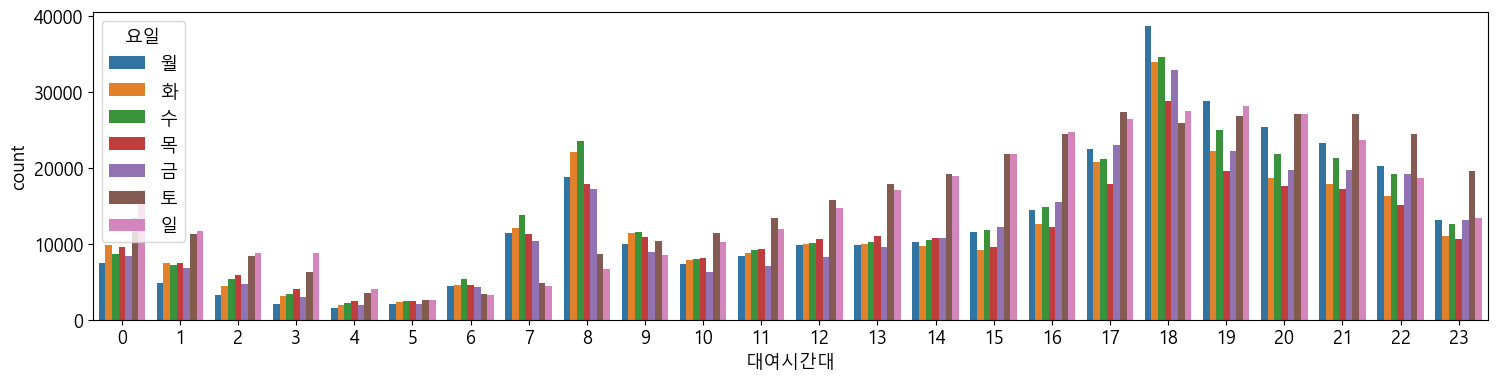

In [116]:
# sns.countplot()를 이용하여 대여시간대 X 요일이용건수 막대그래프 그리기

plt.figure(figsize=(18,4))
sns.countplot(data=bikes, x = '대여시간대', hue='요일', hue_order=list('월화수목금토일'))
plt.show()

In [119]:
bikes.head(3)

자전거번호                대여일시  대여 대여소번호            대여 대여소명  이용시간  이용거리  일자  \
0  SPB-22040 2019-06-03 08:49:00       646  장한평역 1번출구 (국민은행앞)    27  1330   3   
1  SPB-07446 2019-06-03 08:33:00       526           용답토속공원 앞    54  1180   3   
2  SPB-20387 2019-06-05 08:27:00       646  장한평역 1번출구 (국민은행앞)    12  1930   5   

   대여시간대 요일 주말구분   대여구  대여점위도  대여점경도  
0      8  월   평일  동대문구  37.56 127.06  
1      8  월   평일   성동구  37.56 127.06  
2      8  수   평일  동대문구  37.56 127.06

In [121]:
# 두가지 요인을 위해 피봇 테이블 생성하기: 대여시간대 X 요일별 자전거 이용건수
# hourly_dayofweek_ride에 저장

hourly_dayofweek_ride = bikes.pivot_table(index='대여시간대', columns='요일', values='자전거번호', aggfunc='count')
hourly_dayofweek_ride.head()

요일        금     목     수     월      일      토     화
대여시간대                                            
0      8353  9568  8624  7461  17025  13438  9907
1      6748  7508  7226  4846  11731  11232  7529
2      4762  5857  5328  3305   8804   8348  4497
3      3045  3992  3430  2102   8748   6221  3157
4      1979  2402  2160  1544   4076   3584  1971

<Axes: xlabel='요일', ylabel='대여시간대'>

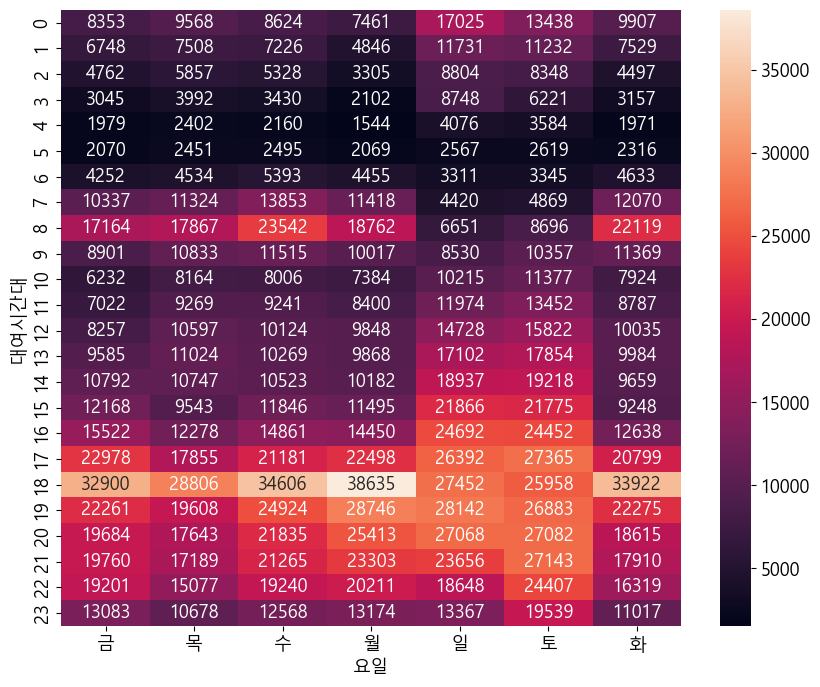

In [123]:
# sns의 대여시간대 X 요일이용건수 히트맵그래프 그리기

plt.figure(figsize=(10,8))
sns.heatmap(data=hourly_dayofweek_ride, annot=True, fmt='d') 


## 6. 주말 구분 시각화 

In [136]:
## 주말 구분이 들어간 피봇 테이블 설정하기 weekdays_hourly_ride
# weekdays_hourly_ride = bikes.pivot_table(index='대여시간대', columns='요일', values='자전거번호', aggfunc='count')
weekdays_hourly_ride = bikes.pivot_table(index='대여시간대', columns='주말구분', values='자전거번호', aggfunc='count')
weekdays_hourly_ride.head()

주말구분      주말     평일
대여시간대              
0      30463  43913
1      22963  33857
2      17152  23749
3      14969  15726
4       7660  10056

<Axes: title={'center': '대여시간대 X 주말여부 이용건수'}, xlabel='대여시간대'>

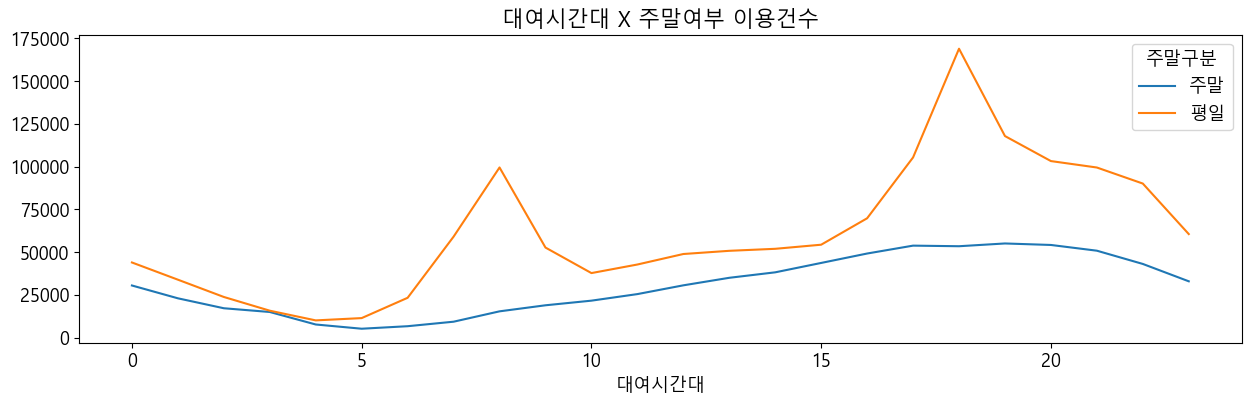

In [139]:
# weekdays_hourly_ride를 이용하여 대여시간대 X 주말이용건수 선그래프 그리기
weekdays_hourly_ride.plot(kind='line', title='대여시간대 X 주말여부 이용건수', figsize=(15,4))

<Axes: title={'center': '대여시간대 X 주말여부 이용건수'}, xlabel='대여시간대'>

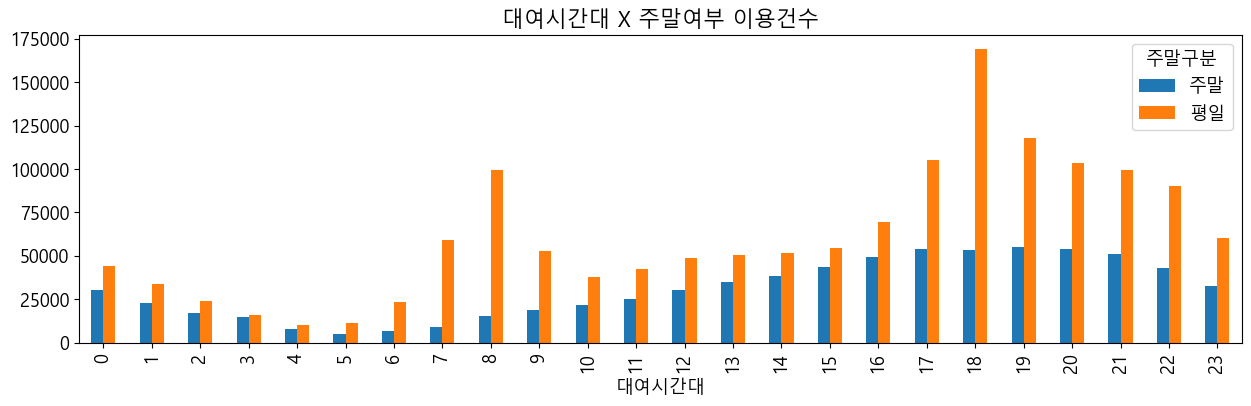

In [140]:
# weekdays_hourly_ride를 이용하여 대여시간대 X 주말이용건수 막대그래프 그리기
weekdays_hourly_ride.plot(kind='bar', title='대여시간대 X 주말여부 이용건수', figsize=(15,4))

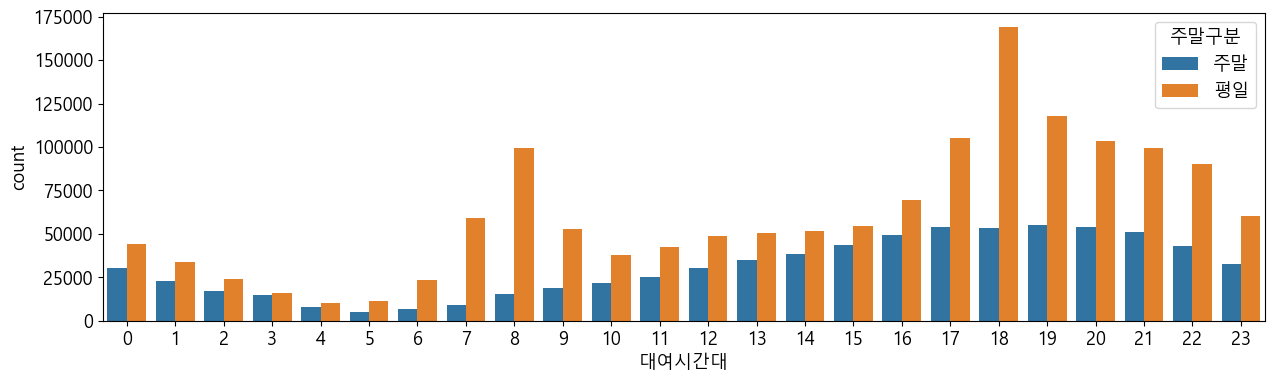

In [142]:
# sns.countplot을 이용하여 대여시간대 X 주말이용건수 선그래프 그리기

plt.figure(figsize=(15, 4))
sns.countplot(data=bikes, x = '대여시간대', hue='주말구분')
plt.show()

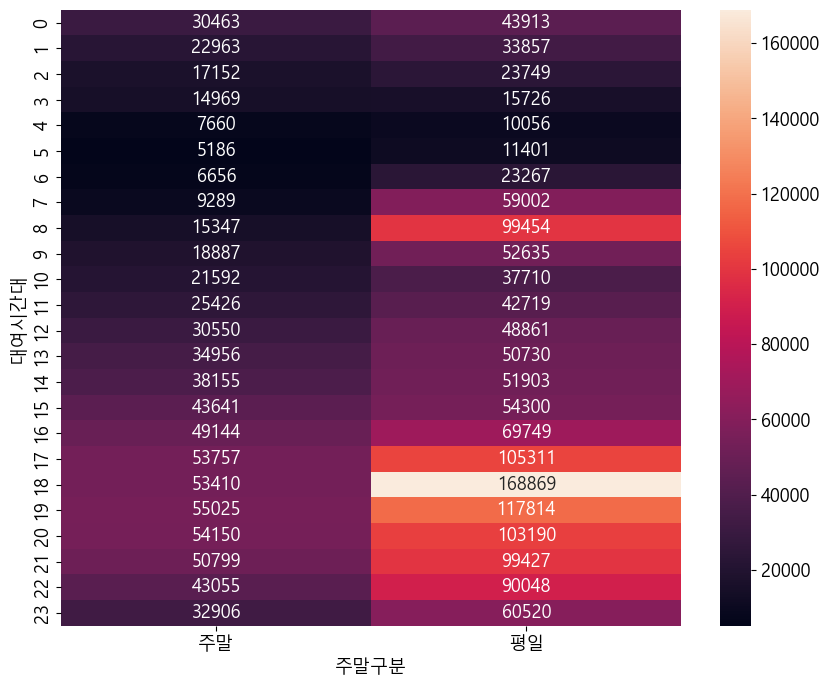

In [126]:
# sns를 이용하여 대여시간대 X 주말이용건수 히트맵 그리기

plt.figure(figsize=(10,8))
sns.heatmap(data=weekdays_hourly_ride, annot=True, fmt='d') 
plt.show()

## 7. 장소에 따른 시각화 folium

In [204]:
# 대여구별 이용건수 피봇테이블 만들기, 구별자전거이용건수
area_bike_count = bikes.pivot_table(index='대여구', values='자전거번호', aggfunc='count')
area_bike_count

자전거번호
대여구         
강남구    97081
강동구    78231
강북구    40563
강서구   141006
관악구    83382
광진구   141996
구로구    78696
금천구    33488
노원구   113823
도봉구    38697
동대문구   77505
동작구    54094
마포구   158539
서대문구   67561
서초구    97718
성동구   103806
성북구    71985
송파구   189706
양천구    64154
영등포구  179439
용산구    47993
은평구    62996
종로구    81944
중구     48533
중랑구    56413

In [188]:
# 구별자전거이용건수 데이터프레임을 이용건수를 기준으로 오름차순으로 정렬하기

area_bike_count.sort_values(by='자전거번호', ascending=True, inplace=True)

<Axes: title={'center': '대여구별 자전거 이용건수'}, ylabel='대여구'>

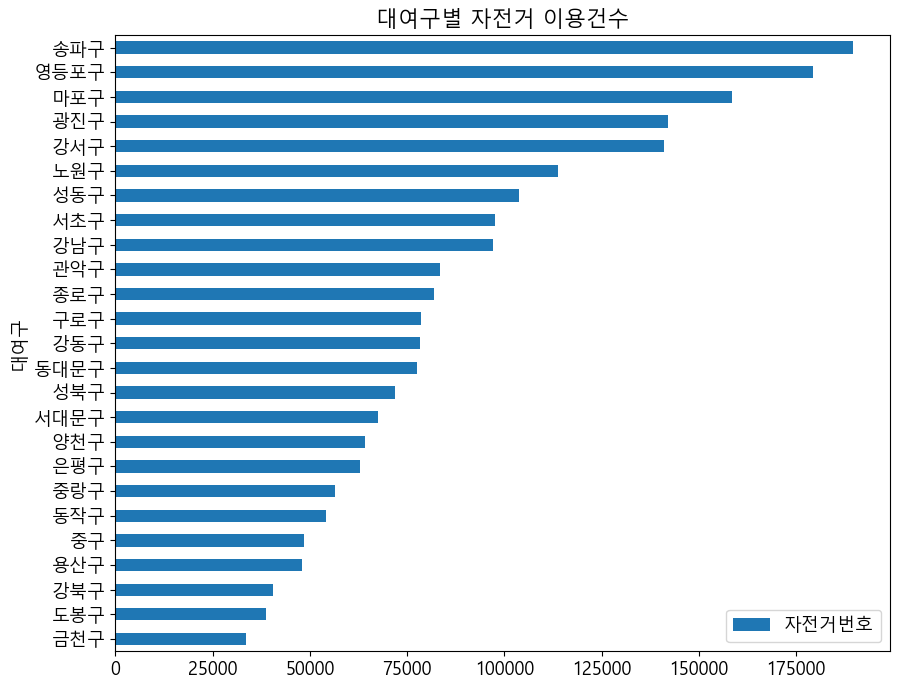

In [189]:
# 구별자전거이용건수 수평막대그래프 그리기
# weekdays_hourly_ride.plot(kind='bar', title='대여시간대 X 주말여부 이용건수', figsize=(15,4))
area_bike_count.plot(kind='barh', title='대여구별 자전거 이용건수', figsize=(10,8))

In [190]:
# 구별자전거이용건수 인덱스 번호 초기화하기기
area_bike_count.reset_index(inplace=True)
area_bike_count.head(2)

대여구  자전거번호
0  금천구  33488
1  도봉구  38697

In [181]:
# 서울시 지도파일 정보 로드하기기

import json
with open('data/seoul.json','r', encoding='utf-8') as f:
    seoul_map = json.load(f)

In [182]:
seoul_map

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'properties': {'code': '11250',
    'name': '강동구',
    'name_eng': 'Gangdong-gu',
    'base_year': '2013'},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[127.11519584981606, 37.557533180704915],
      [127.11540412678968, 37.557491025257455],
      [127.1165206546129, 37.557268061772696],
      [127.1175954493625, 37.55705301284316],
      [127.11879551821994, 37.557222485451305],
      [127.11969651045837, 37.558176474822524],
      [127.12057912633198, 37.5590144597372],
      [127.12146867175024, 37.55986003393365],
      [127.12240146859469, 37.5604208685133],
      [127.12287911525227, 37.56070873375976],
      [127.12303576608339, 37.56078573052513],
      [127.12435254630417, 37.56144246249796],
      [127.12447748580927, 37.56148569898355],
      [127.13349006006634, 37.56465664804646],
      [127.13357625665371, 37.56468978043648],
      [127.1336638698021, 37.56472375596808],
      [127.133755022522

In [170]:
# 지도에 나타내기 위해 대여점 위도와 대여점 경도의 평균값 구하기
# '대여점위도', '대여점경도'
lat = bikes['대여점위도'].mean()
lon = bikes['대여점경도'].mean()
print(lat, lon)

37.54734988442208 126.99171375924


In [196]:
# 지도에 위치 표시하기 folium.Map() 함수 이용

map1 = folium.Map(location=[lat,lon], zoom_start=11)
map1

In [198]:
# 지도위에 구별자전거 이용건수 시각화하기 folium.Choropleth() 사용
# seoul_map, area_bike_count
map1 = folium.Map(location=[lat,lon], zoom_start=11)
folium.Choropleth(geo_data=seoul_map, data=area_bike_count, 
                  columns=['대여구', '자전거번호'], 
                  key_on='feature.properties.name').add_to(map1)

map1


In [202]:
## 미션: 구별이용시간평균 지도에 나타내기 ##


In [203]:
# 대여구별 이용시간평균 (이용시간)
# 1단계 : 피봇 테이블 만들기
구별이용시간평균 = bikes.pivot_table(index='대여구', values='이용시간')
구별이용시간평균

이용시간
대여구       
강남구  31.79
강동구  25.39
강북구  23.57
강서구  23.14
관악구  26.51
광진구  24.95
구로구  26.48
금천구  26.40
노원구  24.26
도봉구  24.99
동대문구 23.78
동작구  31.66
마포구  30.66
서대문구 28.25
서초구  32.09
성동구  30.01
성북구  23.17
송파구  27.85
양천구  25.49
영등포구 29.47
용산구  35.30
은평구  25.16
종로구  23.32
중구   25.95
중랑구  24.24

In [206]:
#이용시간 컬럼을 기준으로 오름차순 정렬

구별이용시간평균.sort_values(by='이용시간', ascending=True, inplace=True)
구별이용시간평균

이용시간
대여구       
강서구  23.14
성북구  23.17
종로구  23.32
강북구  23.57
동대문구 23.78
중랑구  24.24
노원구  24.26
광진구  24.95
도봉구  24.99
은평구  25.16
강동구  25.39
양천구  25.49
중구   25.95
금천구  26.40
구로구  26.48
관악구  26.51
송파구  27.85
서대문구 28.25
영등포구 29.47
성동구  30.01
마포구  30.66
동작구  31.66
강남구  31.79
서초구  32.09
용산구  35.30

<Axes: title={'center': '구별 이용시간 평균'}>

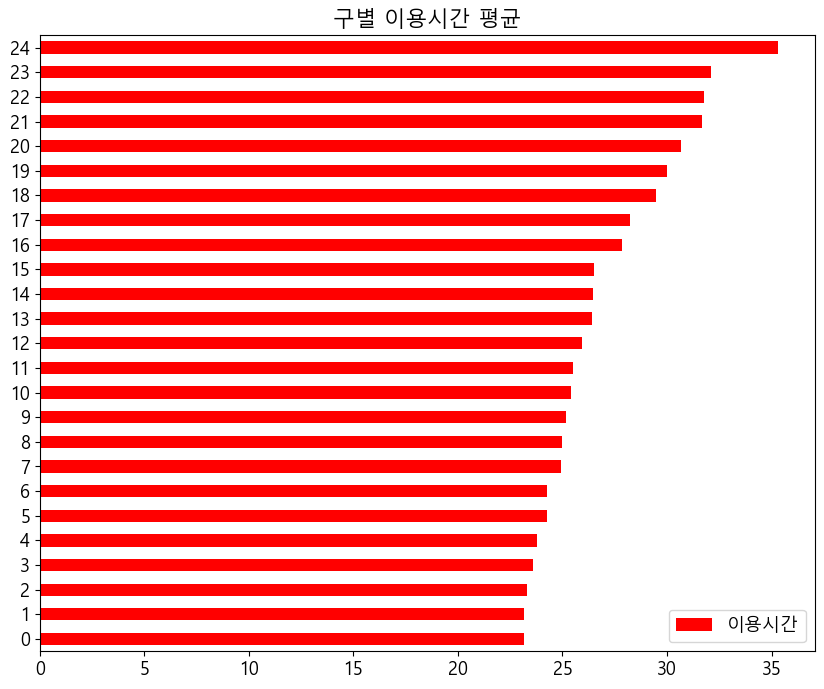

In [229]:
구별이용시간평균.plot(kind='barh', title='구별 이용시간 평균', figsize=(10,8), color = 'red')

In [210]:
# 구별 이용시간 평균 reset_index
구별이용시간평균.reset_index(inplace=True)
구별이용시간평균

대여구  이용시간
0    강서구 23.14
1    성북구 23.17
2    종로구 23.32
3    강북구 23.57
4   동대문구 23.78
5    중랑구 24.24
6    노원구 24.26
7    광진구 24.95
8    도봉구 24.99
9    은평구 25.16
10   강동구 25.39
11   양천구 25.49
12    중구 25.95
13   금천구 26.40
14   구로구 26.48
15   관악구 26.51
16   송파구 27.85
17  서대문구 28.25
18  영등포구 29.47
19   성동구 30.01
20   마포구 30.66
21   동작구 31.66
22   강남구 31.79
23   서초구 32.09
24   용산구 35.30

In [213]:
#지도 표시하기

map2 = folium.Map(location=[lat,lon], zoom_start=11)
map2

In [214]:
#구별이용기간 평균에 사용하여 지도를 시각화
map2 = folium.Map(location=[lat,lon], zoom_start=11)
folium.Choropleth(geo_data=seoul_map, data=구별이용시간평균, 
                  columns=['대여구', '이용시간'], 
                  key_on='feature.properties.name').add_to(map2)
map2

## 8 . 시간적 X 장소적

In [218]:
# pivot_table로 대여일자X 대여구별 따릉이 이용건수 계산하기, daily_gu_use

daily_gu_use = bikes.pivot_table(index='일자', columns='대여구', values='자전거번호', aggfunc='count')
daily_gu_use

대여구   강남구   강동구   강북구   강서구   관악구   광진구   구로구   금천구   노원구   도봉구  ...   성동구  \
일자                                                               ...         
1    3227  2774  1460  4476  3030  5215  2604   934  4015  1366  ...  3505   
2    3071  2582  1518  4250  3198  5102  2526   916  3943  1351  ...  3628   
3    3873  2734  1398  4987  3033  5290  2879  1340  4097  1414  ...  3676   
4    3601  2820  1414  5120  3030  5213  2981  1281  4451  1441  ...  3998   
5    3303  2735  1442  5280  3036  4879  2829  1294  4341  1385  ...  3672   
6    1449  1371   743  2125  1448  2298  1282   456  2101   729  ...  1659   
7    2458  1878   899  3320  1959  3201  1870   674  2746   880  ...  2481   
8    3345  2978  1540  4712  3343  5437  2787   953  4159  1493  ...  3629   
9    2380  2194  1216  3354  2561  3772  1922   661  3134  1120  ...  2719   
10   2838  1946  1019  3751  2312  3943  2180   953  3275  1100  ...  2820   
11   3893  3044  1459  5403  2999  5152  2916  1410  4401  1462  ...  3801   
12   3685  2902  1518  5471  3075  4976  2892  1379  4378  1480  ...  3442   
13   3600  2985  1431  5278  3010  5322  2806  1214  4246  1414  ...  3401   
14   3458  2927  1523  5510  3058  5298  2964  1391  4236  1368  ...  3597   
15   2764  2592  1411  4393  2938  4492  2739   883  3676  1299  ...  2924   
16   3100  2883  1432  4700  3074  5346  2676   909  4024  1378  ...  3900   
17   3762  2824  1493  5449  2940  5119  3017  1446  4291  1515  ...  3940   
18   2003  1347   571  2813  1543  2774  1680   880  1475   491  ...  2104   
19   3668  2589  1363  5177  2718  4961  2696  1376  3797  1272  ...  3402   
20   3786  2955  1492  5730  2881  5648  2957  1457  4129  1375  ...  4069   
21   3591  2774  1280  5445  2694  4957  2797  1385  3588  1192  ...  3804   
22   3518  2855  1621  5075  3029  5441  2823  1011  4152  1442  ...  4023   
23   3086  2452  1552  4540  2958  4947  2667   906  4170  1326  ...  3760   
24   3899  2921  1500  5594  2930  5062  3032  1460  4218  1462  ...  4181   
25   3656  2929  1504  5693  3070  5152  3125  1504  4236  1496  ...  4019   
26   3499  2709  1458  5296  2698  4873  2810  1347  3985  1340  ...  3737   
27   3398  2638  1379  5132  2951  4776  2827  1306  3729  1341  ...  3745   
28   3429  2715  1324  4790  2623  4438  2531  1216  3775  1296  ...  3586   
29   2637  2426  1203  3933  2567  4087  2310   737  3383  1135  ...  3070   
30   3104  2752  1400  4209  2676  4825  2571   809  3672  1334  ...  3514   

대여구   성북구   송파구   양천구  영등포구   용산구   은평구   종로구    중구   중랑구  
일자                                                         
1    2516  7206  2229  6327  1879  2286  2688  1561  1977  
2    2444  6545  2056  6270  1883  2184  2463  1387  1807  
3    2620  6233  2186  6813  1663  2170  3090  1837  2047  
4    2728  6587  2364  6483  1543  2182  2896  1836  2082  
5    2573  6501  2278  6296  1595  2176  3120  1939  2113  
6    1360  3050  1005  2566   739  1147  1209   669  1096  
7    1733  4676  1551  4388  1148  1536  1994  1090  1218  
8    2623  7369  2372  6859  1927  2370  2573  1472  2084  
9    2088  5236  1706  4538  1316  1668  2069  1126  1514  
10   2076  5084  1577  4666  1267  1698  2325  1409  1501  
11   2680  6865  2395  6467  1753  2351  2818  1810  2104  
12   2646  6714  2350  6189  1654  2178  2859  1770  2170  
13   2596  6491  2242  5847  1541  2235  2653  1601  2045  
14   2783  6961  2438  6542  1716  2202  3074  1974  2186  
15   2280  5960  2119  5564  1526  2099  2344  1337  1820  
16   2469  6925  2279  6707  1975  2224  2612  1442  1921  
17   2531  6776  2455  7119  1938  2277  3455  2070  2084  
18   1256  3440  1164  3607   789  1067  1743  1118   855  
19   2395  6283  2252  6333  1517  2136  3426  1996  1793  
20   2763  7084  2372  6897  1822  2340  3529  2036  2111  
21   2542  6753  2322  6304  1446  2266  3281  1990  1932  
22   2649  7623  2338  6650  2055  2448  2782  1563  2072  
23   2500  6769  2282  6734  2091  2185  2599  1339  1858  
24 

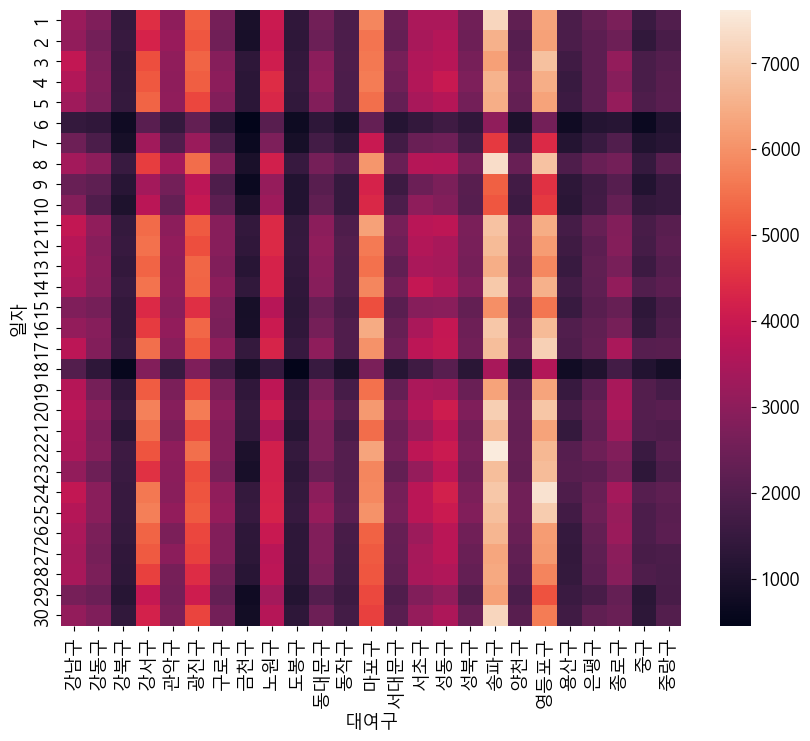

In [237]:
# 대여일자X 대여구별 따릉이 이용건수 히트맵으로 표시하기기

plt.figure(figsize=(10,8))
sns.heatmap(data=daily_gu_use)
plt.show()

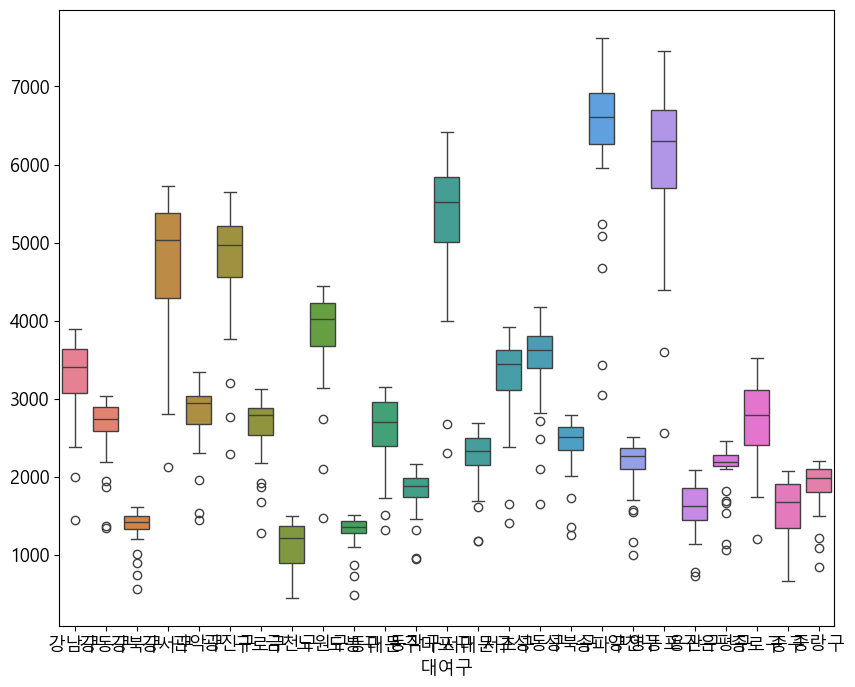

In [232]:
# 대여일자X 대여구별 따릉이 이용건수 박스플롯으로 그리기

plt.figure(figsize=(10,8))
sns.boxplot(data=daily_gu_use)
plt.show()

In [224]:
## 미션: 대여시간대별 ##

In [225]:
## 대여시간대 X 대여구 따릉이 이용건수 계산하기

hourly_gu_use = bikes.pivot_table(index='대여시간대', columns='대여구', values='자전거번호', aggfunc='count')
hourly_gu_use

대여구      강남구   강동구   강북구    강서구   관악구    광진구   구로구   금천구   노원구   도봉구  ...  \
대여시간대                                                                 ...   
0       2643  3230  2066   4459  3769   5314  2650   790  4855  1529  ...   
1       2660  2342  1706   3306  2830   3621  1797   650  3632  1297  ...   
2       2360  1852  1378   2442  1899   2469  1291   496  2610   853  ...   
3       1689  1398   932   1909  1550   1830   853   328  1932   668  ...   
4        920   620   595   1152   990    998   572   173  1052   403  ...   
5        648   686   392   1072   745    992   543   161   829   416  ...   
6       1316  1173   499   2144  1042   1687  1081   511  1413   498  ...   
7       2404  2420  1047   4854  2800   3512  3091  1623  2841  1120  ...   
8       4951  3728  1533   9357  4350   6988  4691  3337  4491  1541  ...   
9       3202  2413  1160   4766  2414   4939  2550  1350  3259  1189  ...   
10      2376  2247  1078   3722  2037   4208  2071   678  3176  1027  ...   
11      2733  2227  1178   4183  2205   4280  2163   906  3479  1122  ...   
12      3458  2709  1360   4900  2635   5006  2568   993  4103  1433  ...   
13      3749  3037  1505   5229  2865   5591  2945  1055  4523  1465  ...   
14      3948  3103  1572   5474  2960   6153  2803  1064  4975  1496  ...   
15      4448  3469  1656   5579  3114   6420  3286  1218  5335  1599  ...   
16      5468  3943  2037   6843  3925   7649  4252  1425  6307  1972  ...   
17      8318  5046  2418   9718  4995   9721  5770  2660  7844  2654  ...   
18     12630  6298  3119  14674  6710  11912  9131  5093  9118  3373  ...   
19      7688  5946  2791  11199  6365  11413  6432  2702  8304  2853  ...   
20      6161  5638  2730  10342  6350  10239  5538  2048  8144  2747  ...   
21      5608  5509  2902   9737  6370  10491  5247  1890  8006  2952  ...   
22      4544  5147  2728   8248  5861   9539  4319  1441  7873  2617  ...   
23      3159  4050  2181   5697  4601   7024  3052   896  5722  1873  ...   

대여구      성동구   성북구    송파구   양천구   영등포구   용산구   은평구   종로구    중구   중랑구  
대여시간대                                                                 
0       3003  3165   6014  2091   4892  1641  2389  1697  1180  2369  
1       2096  2501   5150  1770   3314  1334  1873  1299   893  1944  
2       1394  1941   3339  1143   2190   935  1330   978   683  1413  
3       1103  1337   2390   859   1627   755   977   749   564  1171  
4        743   701   1252   479   1109   512   508   552   407   580  
5        698   522   1086   565   1140   305   527   741   442   597  
6       1092  1089   2326   988   2682   541  1025  1079   538   826  
7       2588  2297   5214  2674   6516  1094  2430  2664  1259  2128  
8       5446  3763   9105  3886   9939  1866  3420  4317  2262  3061  
9       3451  2441   5552  2205   5239  1199  2321  3203  1658  1608  
10      2738  2191   4683  1728   4241  1019  1899  2645  1554  1461  
11      3200  2278   5216  1973   6276  1377  1979  3670  2087  1632  
12      3838  2467   6410  2285   6713  1481  2507  4030  2264  1897  
13      4038  2743   7053  2354   6807  1601  2510  4401  2492  2059  
14      4604  2783   7819  2449   7264  1798  2419  4370  2592  2022  
15      5061  3127   8400  2702   7826  2413  2731  4547  2872  2247  
16      5844  3771  10168  3420  10135  2773  3072  5396  3084  2689  
17      8394  4448  13010  4050  15548  3498  4016  7180  4346  3577  
18     12116  5291  19711  6120  21577  5363  5134  8944  5851  4372  
19      8338  4936  16201  4621  13860  4138  4552  5452  3269  4146  
20      7322  4884  14966  4484  12740  3723  4402  4452  2603  4027  
21      6831  4964  14016  4252  11559  3601  4140  4008  2371  3932  
22      5929  4594  12391  4351   9773  3059  3899  3322  1908  3828  
23      3939  3751   8234  2705   6472  1967  2936  2248  1354  2827  

[24 rows x 25 columns]

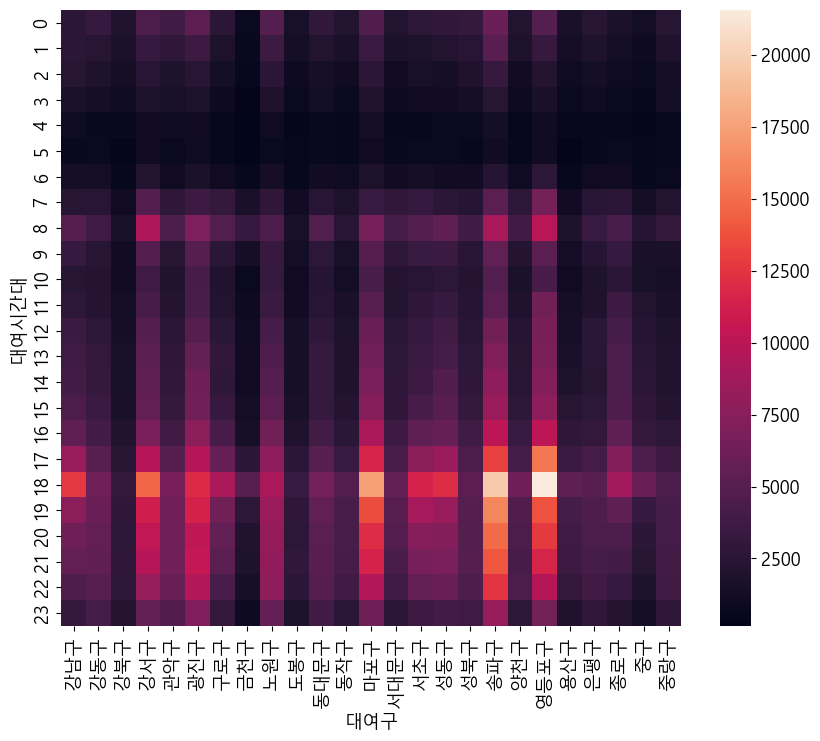

In [ ]:
#히트맵
plt.figure(figsize=(10,8))
sns.heatmap(data=hourly_gu_use)
plt.show()

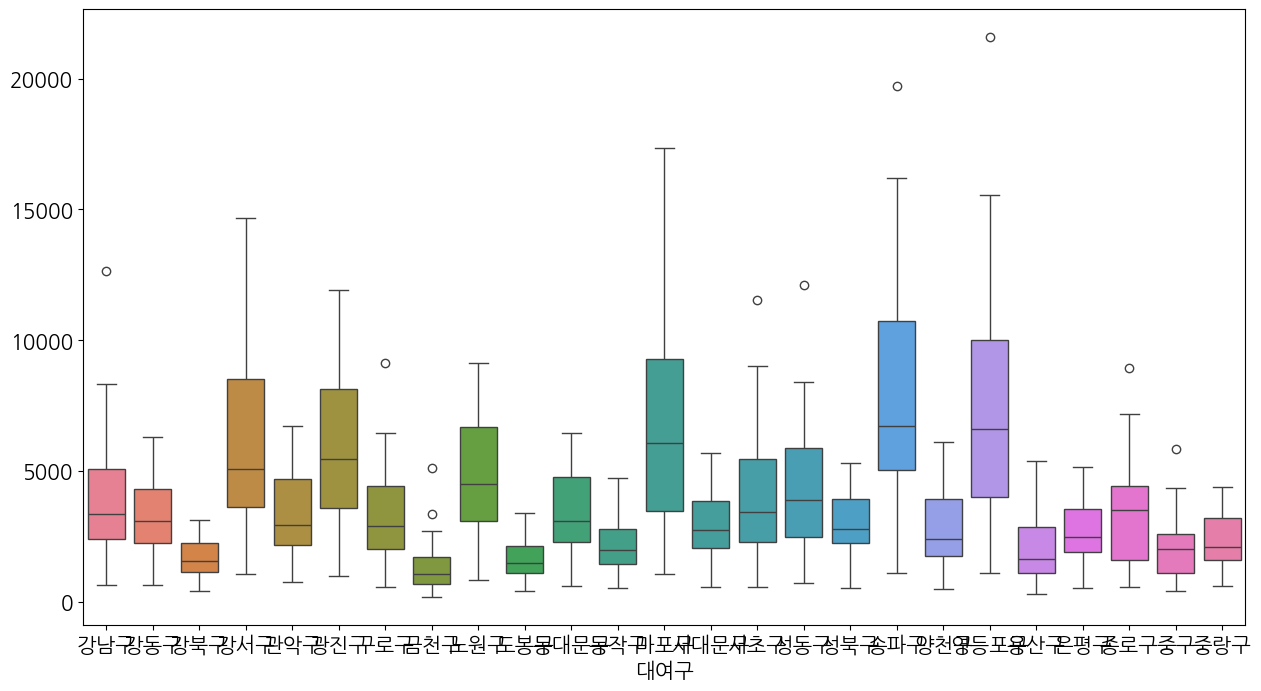

In [119]:
# 박스 그래프로 표기
plt.figure(figsize=(15,8))

## 9. TOP 50


In [ ]:
# 미션: 서울시에서 주말에 인기있는 TOP 대여소 지도에 표시하기
# 미션: 서울시에서 평일일에 인기있는 TOP 대여소 지도에 표시하기

In [121]:
## 대여 대여소  X 주말 구분 이용건수 계산을 위한 피벗 테이블



주말구분                            주말    평일
대여 대여소명         대여점위도 대여점경도             
(구)신한은행 중랑교지점   37.60 127.08   391   832
(구)합정동 주민센터     37.55 126.91   357   715
3호선 매봉역 3번출구앞   37.49 127.05   443  1049
419민주묘지역        37.65 127.01   547   946
8삼호@ 2동 ( 간선도로) 37.49 127.05   111   316
...                            ...   ...
휘봉고등학교 앞        37.59 127.07   193   370
흑석역 1번출구        37.51 126.96  1297  2195
흑석역 4번출구        37.51 126.96   184   412
흑석한강푸르지오 106동앞  37.51 126.97    67   168
희성오피앙           37.68 127.06   245   418

[1524 rows x 2 columns]

In [122]:
# 대여 대여소  X 주말 구분 이용건수 계산을 위한 피벗 테이블 만들기 
# '대여 대여소명','대여점위도','대여점경도'

rent_bikes = 
rent_bikes

주말구분                            주말    평일
대여 대여소명         대여점위도 대여점경도             
(구)신한은행 중랑교지점   37.60 127.08   391   832
(구)합정동 주민센터     37.55 126.91   357   715
3호선 매봉역 3번출구앞   37.49 127.05   443  1049
419민주묘지역        37.65 127.01   547   946
8삼호@ 2동 ( 간선도로) 37.49 127.05   111   316
...                            ...   ...
휘봉고등학교 앞        37.59 127.07   193   370
흑석역 1번출구        37.51 126.96  1297  2195
흑석역 4번출구        37.51 126.96   184   412
흑석한강푸르지오 106동앞  37.51 126.97    67   168
희성오피앙           37.68 127.06   245   418

[1524 rows x 2 columns]

In [123]:
# 인기있는 주말 대여점 50개를 구하기


주말구분                                    주말    평일
대여 대여소명                 대여점위도 대여점경도             
뚝섬유원지역 1번출구 앞           37.53 127.07  5777  6840
여의나루역 1번출구 앞            37.53 126.93  5286  6241
고속터미널역 8-1번, 8-2번 출구 사이 37.51 127.00  3932  4556
봉림교 교통섬                 37.48 126.93  3699  5986
롯데월드타워(잠실역2번출구 쪽)       37.51 127.10  3231  5383
마포구민체육센터 앞              37.56 126.90  3229  3893
건대입구역 사거리(롯데백화점)        37.54 127.07  3169  4573
홍대입구역 2번출구 앞            37.56 126.92  2922  5617
잠실새내역 5번 출구 뒤           37.51 127.09  2632  3660
당산육갑문                   37.54 126.90  2327  3005
신도림역 1번 출구 앞            37.51 126.89  2304  3959
IFC몰                    37.53 126.93  2240  3228
합정역 7번출구 앞              37.55 126.91  2194  2859
동방1교                    37.47 126.93  2170  3925
서울숲 관리사무소               37.54 127.04  2141  1612
안암로터리 버스정류장 앞           37.58 127.03  2058  4127
올림픽공원역 3번출구             37.52 127.13  2011  2642
CJ 드림시티                 37.60 126.92  2002  3325
당산역 10번출구 앞             37.53 126.90  1978  3357
노들역 1번출구                37.51 126.95  1905  2979
신대방역 2번 출구              37.49 126.91  1897  3613
옥수역 3번출구                37.54 127.02  1875  2833
몽촌토성역 1번출구 옆            37.52 127.11  1874  2362
청계천 생태교실 앞              37.57 127.05  1871  2869
가양역 8번출구                37.56 126.85  1860  3561
양천향교역 7번출구앞             37.57 126.84  1765  4342
잠실역 8번출구                37.51 127.10  1746  2817
발산역 1번, 9번 인근 대여소       37.56 126.84  1733  3639
마곡나루역 5번출구 뒤편           37.57 126.83  1700  4648
잠실나루역 (2번 출구 쪽)         37.52 127.10  1700  3105
현대고등학교 건너편              37.52 127.02  1672  2099
커먼그라운드                  37.55 127.09  1671  2884
천호역4번출구(현대백화점)          37.54 127.12  1655  2720
오목교역 7번출구 앞             37.52 126.88  1652  3014
자양사거리 광진아크로텔 앞          37.54 127.08  1637  3243
월드컵경기장역 3번출구 옆          37.57 126.90  1621  1822
신도림테크노근린공원              37.51 126.89  1619  2646
월드컵공원                   37.56 126.90  1606   926
한성백제역 2번 출구             37.52 127.12  1597  2211
초원아파트 앞                 37.53 126.92  1543  1395
한신16차아파트 119동 앞         37.52 127.01  1534  1925
건대입구역 5번출구 뒤            37.54 127.07  1522  2476
센트럴 푸르지오 시티 앞           37.52 126.90  1515  2177
잠실나들목                   37.52 127.09  1508  1838
홈플러스 앞                  37.57 126.90  1496  1989
홍대입구역 8번출구 앞            37.56 126.92  1494  2529
뚝섬역 1번 출구 옆             37.55 127.05  1486  2265
방이삼거리                   37.51 127.11  1482  2531
영등포역지하쇼핑센타 5번출구         37.52 126.91  1479  2767
당곡사거리                   37.49 126.93  1478  2991

In [124]:
# 인기있는 주말 대여점 50개중 '주말' 컬럼만 추출


대여 대여소명                  대여점위도  대여점경도 
뚝섬유원지역 1번출구 앞            37.53  127.07    5777
여의나루역 1번출구 앞             37.53  126.93    5286
고속터미널역 8-1번, 8-2번 출구 사이  37.51  127.00    3932
봉림교 교통섬                  37.48  126.93    3699
롯데월드타워(잠실역2번출구 쪽)        37.51  127.10    3231
마포구민체육센터 앞               37.56  126.90    3229
건대입구역 사거리(롯데백화점)         37.54  127.07    3169
홍대입구역 2번출구 앞             37.56  126.92    2922
잠실새내역 5번 출구 뒤            37.51  127.09    2632
당산육갑문                    37.54  126.90    2327
신도림역 1번 출구 앞             37.51  126.89    2304
IFC몰                     37.53  126.93    2240
합정역 7번출구 앞               37.55  126.91    2194
동방1교                     37.47  126.93    2170
서울숲 관리사무소                37.54  127.04    2141
안암로터리 버스정류장 앞            37.58  127.03    2058
올림픽공원역 3번출구              37.52  127.13    2011
CJ 드림시티                  37.60  126.92    2002
당산역 10번출구 앞              37.53  126.90    1978
노들역 1번출구                 37.51  126.95    1905
신대방역 2번 출구           

In [125]:
# 인기있는 주말 대여점 50개중 '주말' 컬럼만 추출하여 주말대여점50에 저장장

주말대여점50 = 
주말대여점50

대여 대여소명  대여점위도  대여점경도    주말
0             뚝섬유원지역 1번출구 앞  37.53 127.07  5777
1              여의나루역 1번출구 앞  37.53 126.93  5286
2   고속터미널역 8-1번, 8-2번 출구 사이  37.51 127.00  3932
3                   봉림교 교통섬  37.48 126.93  3699
4         롯데월드타워(잠실역2번출구 쪽)  37.51 127.10  3231
5                마포구민체육센터 앞  37.56 126.90  3229
6          건대입구역 사거리(롯데백화점)  37.54 127.07  3169
7              홍대입구역 2번출구 앞  37.56 126.92  2922
8             잠실새내역 5번 출구 뒤  37.51 127.09  2632
9                     당산육갑문  37.54 126.90  2327
10             신도림역 1번 출구 앞  37.51 126.89  2304
11                     IFC몰  37.53 126.93  2240
12               합정역 7번출구 앞  37.55 126.91  2194
13                     동방1교  37.47 126.93  2170
14                서울숲 관리사무소  37.54 127.04  2141
15            안암로터리 버스정류장 앞  37.58 127.03  2058
16              올림픽공원역 3번출구  37.52 127.13  2011
17                  CJ 드림시티  37.60 126.92  2002
18              당산역 10번출구 앞  37.53 126.90  1978
19                 노들역 1번출구  37.51 126.95  1905
20               신대방역 2번 출구  37.49 126.91  1897
21                 옥수역 3번출구  37.54 127.02  1875
22             몽촌토성역 1번출구 옆  37.52 127.11  1874
23               청계천 생태교실 앞  37.57 127.05  1871
24                 가양역 8번출구  37.56 126.85  1860
25              양천향교역 7번출구앞  37.57 126.84  1765
26                 잠실역 8번출구  37.51 127.10  1746
27        발산역 1번, 9번 인근 대여소  37.56 126.84  1733
28            마곡나루역 5번출구 뒤편  37.57 126.83  1700
29          잠실나루역 (2번 출구 쪽)  37.52 127.10  1700
30               현대고등학교 건너편  37.52 127.02  1672
31                   커먼그라운드  37.55 127.09  1671
32           천호역4번출구(현대백화점)  37.54 127.12  1655
33              오목교역 7번출구 앞  37.52 126.88  1652
34           자양사거리 광진아크로텔 앞  37.54 127.08  1637
35           월드컵경기장역 3번출구 옆  37.57 126.90  1621
36               신도림테크노근린공원  37.51 126.89  1619
37                    월드컵공원  37.56 126.90  1606
38              한성백제역 2번 출구  37.52 127.12  1597
39                  초원아파트 앞  37.53 126.92  1543
40          한신16차아파트 119동 앞  37.52 127.01  1534
41             건대입구역 5번출구 뒤  37.54 127.07  1522
42            센트럴 푸르지오 시티 앞  37.52 126.90  1515
43                    잠실나들목  37.52 127.09  1508
44                   홈플러스 앞  37.57 126.90  1496
45             홍대입구역 8번출구 앞  37.56 126.92  1494
46              뚝섬역 1번 출구 옆  37.55 127.05  1486
47                    방이삼거리  37.51 127.11  1482
48          영등포역지하쇼핑센타 5번출구  37.52 126.91  1479
49                    당곡사거리  37.49 126.93  1478

In [127]:
# 평일대여점 데이터 프레임 만들기기
평일대여점50 = 
평일대여점50

대여 대여소명  대여점위도  대여점경도    평일
0             뚝섬유원지역 1번출구 앞  37.53 127.07  6840
1              여의나루역 1번출구 앞  37.53 126.93  6241
2                   봉림교 교통섬  37.48 126.93  5986
3              홍대입구역 2번출구 앞  37.56 126.92  5617
4         롯데월드타워(잠실역2번출구 쪽)  37.51 127.10  5383
5             마곡나루역 5번출구 뒤편  37.57 126.83  4648
6          건대입구역 사거리(롯데백화점)  37.54 127.07  4573
7   고속터미널역 8-1번, 8-2번 출구 사이  37.51 127.00  4556
8               양천향교역 7번출구앞  37.57 126.84  4342
9             안암로터리 버스정류장 앞  37.58 127.03  4127
10             신도림역 1번 출구 앞  37.51 126.89  3959
11                     동방1교  37.47 126.93  3925
12               마포구민체육센터 앞  37.56 126.90  3893
13            건국대학교 (입학정보관)  37.54 127.07  3679
14            잠실새내역 5번 출구 뒤  37.51 127.09  3660
15        발산역 1번, 9번 인근 대여소  37.56 126.84  3639
16               신대방역 2번 출구  37.49 126.91  3613
17               구로디지털단지역 앞  37.48 126.90  3587
18                 가양역 8번출구  37.56 126.85  3561
19              당산역 10번출구 앞  37.53 126.90  3357
20                  CJ 드림시티  37.60 126.92  3325
21           자양사거리 광진아크로텔 앞  37.54 127.08  3243
22                     IFC몰  37.53 126.93  3228
23          잠실나루역 (2번 출구 쪽)  37.52 127.10  3105
24              오목교역 7번출구 앞  37.52 126.88  3014
25                    당산육갑문  37.54 126.90  3005
26                    당곡사거리  37.49 126.93  2991
27                 노들역 1번출구  37.51 126.95  2979
28                상계역(4번출구)  37.66 127.07  2951
29               송파역 2번 출구앞  37.50 127.11  2929
30                군자역 7번출구뒤  37.56 127.08  2896
31                   커먼그라운드  37.55 127.09  2884
32               건국대학교 학생회관  37.54 127.08  2879
33               청계천 생태교실 앞  37.57 127.05  2869
34              영등포구청역 1번출구  37.52 126.90  2865
35               합정역 7번출구 앞  37.55 126.91  2859
36                 석촌역 2번출구  37.51 127.11  2847
37                 옥수역 3번출구  37.54 127.02  2833
38                 잠실역 8번출구  37.51 127.10  2817
39               망원역 1번출구 앞  37.56 126.91  2803
40              공릉역 1번 출구 앞  37.63 127.07  2772
41          영등포역지하쇼핑센타 5번출구  37.52 126.91  2767
42               둔촌역 3번 출입구  37.53 127.14  2754
43           천호역4번출구(현대백화점)  37.54 127.12  2720
44             송파나루역 4번 출구옆  37.51 127.11  2695
45                   마포구청 앞  37.57 126.90  2680
46                 세종사이버대학교  37.55 127.07  2674
47           어린이대공원역 3번출구 앞  37.55 127.07  2666
48               신도림테크노근린공원  37.51 126.89  2646
49              올림픽공원역 3번출구  37.52 127.13  2642

In [128]:
## 주말 대여점50의 가운데 지점의 위도 경도 중심으로 초기 map 그리기

map3


In [129]:
주말대여점50.head(10)


대여 대여소명  대여점위도  대여점경도    주말
0            뚝섬유원지역 1번출구 앞  37.53 127.07  5777
1             여의나루역 1번출구 앞  37.53 126.93  5286
2  고속터미널역 8-1번, 8-2번 출구 사이  37.51 127.00  3932
3                  봉림교 교통섬  37.48 126.93  3699
4        롯데월드타워(잠실역2번출구 쪽)  37.51 127.10  3231
5               마포구민체육센터 앞  37.56 126.90  3229
6         건대입구역 사거리(롯데백화점)  37.54 127.07  3169
7             홍대입구역 2번출구 앞  37.56 126.92  2922
8            잠실새내역 5번 출구 뒤  37.51 127.09  2632
9                    당산육갑문  37.54 126.90  2327

In [130]:
# for문을 사용해서 주말 대여점 50지도를 시각화하기


map3


In [108]:
## 평일 대여점 이 많은 대여소를 표시


map3

In [ ]:
# 시각화데이터를 통해 정보 및 인사이트 도출하기!!!!